#**Causality Worked Example**

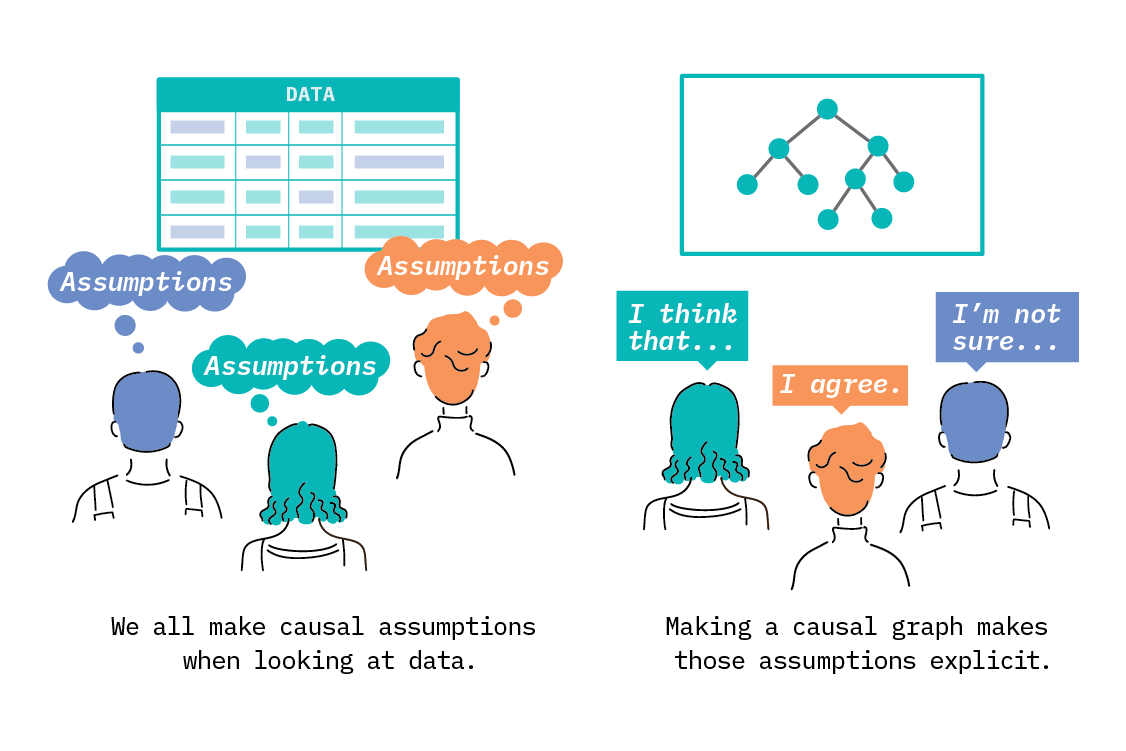

Causal inference is the process of determining the cause-and-effect relationship between two or more variables. In data science, causal inference is used to answer questions about the effects of interventions on outcomes. For example, a data scientist might use causal inference to determine whether a new drug treatment is effective in reducing the risk of heart disease.

There are a number of different methods that can be used for causal inference, each with its own strengths and weaknesses. Some of the most common methods include:


#Randomized controlled trials:

In a randomized controlled trial, participants are randomly assigned to either an intervention group or a control group. The intervention group receives the treatment of interest, while the control group does not. The results of the trial are then compared to see if there is a difference in the outcomes between the two groups.


#Observational studies:

Observational studies do not involve random assignment. Instead, data is collected on a group of people who have already been exposed to the treatment or intervention of interest. The results of observational studies are often more difficult to interpret than the results of randomized controlled trials, because it is more difficult to control for confounding factors.


#Natural experiments:


Natural experiments are situations where the assignment of treatment or exposure is not random, but is determined by some other factor. For example, a natural experiment might be a study of the effects of a new law that is passed in a particular state.


Causal inference is a complex and challenging field, but it is an essential tool for data scientists who want to make informed decisions about the effects of their interventions.




# Here are some of the benefits of using causal inference in data science:




1- It can help you to make better decisions about the effects of your interventions.

2- It can help you to identify the root causes of problems.

3- It can help you to develop more effective interventions.

4- It can help you to improve your understanding of the world.


How causality is showcased in this provided Jupyter notebook:

1. **Preliminary Data Analysis**: We proceeds with loading the dataset and performing an initial data review and exploratory data analysis (EDA).

    This includes generating a correlation matrix, which, while indicative of potential associations between variables, is cautioned to not be misinterpreted as causal links.

2. **Advanced Visualizations**: We present sophisticated visualizations, such as 3D surface plots, to illustrate the interactive effects of variables like age and sex on the probability of heart disease.

    These serve to explore the data further and hypothesize about possible relationships.

3. **Statistical Modeling**: The assignment moves on to employ statistical models, such as Random Forest for feature importance and logistic regression for understanding variable influences on the outcome.

    These models aid in identifying variables that might have potential causal relationships with the target outcome.

3. **Interpreting Model Outputs**: Insights are drawn from model outputs, such as the importance of chest pain and maximum heart rate in predicting heart disease.
It cautions against equating model coefficients with causation without rigorous validation.

4. **Causality Visualization Techniques**: Techniques like Partial Dependence Plots (PDPs) and Causal Impact Analysis are mentioned as methods to visualize and infer causality from the data.

5. **Scatter Plots with Regression Lines**: This also describes using scatter plots with regression lines to explore potential linear relationships and to delve into hypothesized causal relationships between selected variables and heart disease.

In essence, we showcased a journey from understanding and visualizing data, to applying statistical models to discern patterns and potential causal relationships, while maintaining a rigorous distinction between correlation and causation, and highlighting the need for further analysis to confirm any causal hypotheses generated from the observed data.

# About the Dataset-
This dataset of breast cancer patients was obtained from the 2017 November update of the SEER Program of the NCI, which provides information on population-based cancer statistics. The dataset involved female patients with infiltrating duct and lobular carcinoma breast cancer (SEER primary cites recode NOS histology codes 8522/3) diagnosed in 2006-2010. Patients with unknown tumour size, examined regional LNs, positive regional LNs, and patients whose survival months were less than 1 month were excluded; thus, 4024 patients were ultimately included.

In [5]:
import pandas as pd

# Reload the dataset after the reset

heart_file_path =("https://raw.githubusercontent.com/RaunakSMatharu/Causaliy_ads/main/heart.csv")
heart_data = pd.read_csv(heart_file_path)

# Display the first few rows of the dataset to understand its structure
heart_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The statistical overview of the heart.csv dataset provides basic insights into the distribution of each variable, such as count, mean, standard deviation, min, max, and quartiles.

The correlation matrix visualized above shows how different variables in the dataset are correlated with each other. In this matrix, a value close to 1 implies a strong positive correlation, a value close to -1 implies a strong negative correlation, and a value around 0 implies no correlation. It's important to remember that correlation does not imply causation. However, it can give us insights into which variables might be worth exploring further for causal relationships.

For example, variables that show a higher correlation with the target variable (which indicates the presence of heart disease) could be interesting to investigate further. These variables might have a potential causal relationship with heart disease, although further analysis is needed to confirm this.

Next, we can perform a regression analysis to explore these relationships in more detail. Focusing on a few variables that show higher correlations with the target and see how they relate to the likelihood of having heart disease. We can use logistic regression for this purpose, as the target variable is binary (presence or absence of heart disease). This will provide us with a model that estimates the probability of heart disease based on the selected variables.

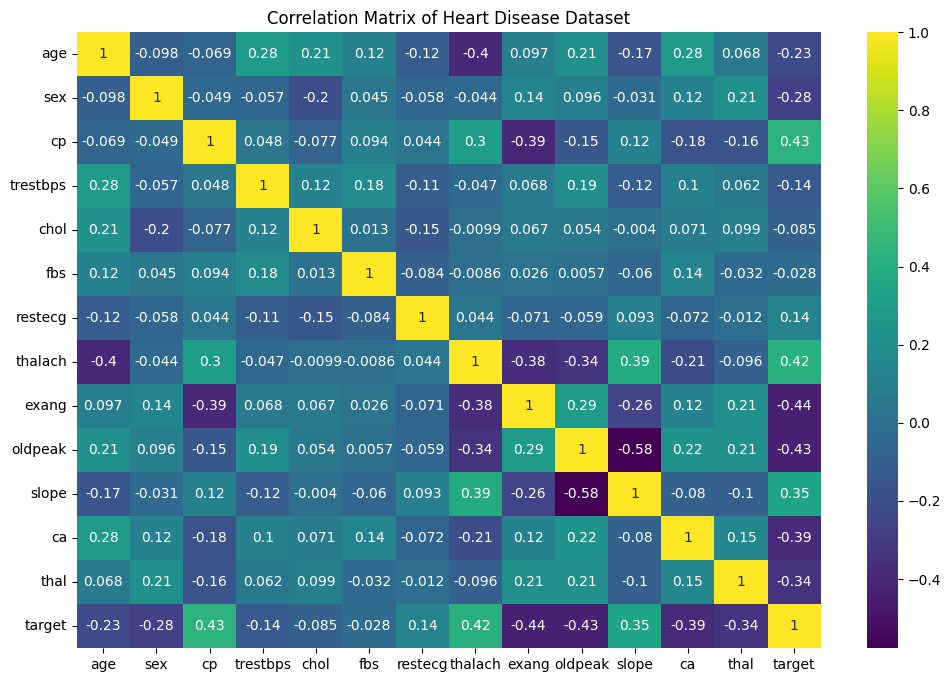

(              age         sex          cp    trestbps        chol         fbs  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
 std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
 min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
 25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
 50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
 75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
 max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   
 
           restecg     thalach       exang     oldpeak       slope          ca  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
 std      0.52

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistical overview
stats_overview = heart_data.describe()

# Correlation matrix
correlation_matrix = heart_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Correlation Matrix of Heart Disease Dataset")
plt.show()

stats_overview, "Displayed is the correlation matrix."


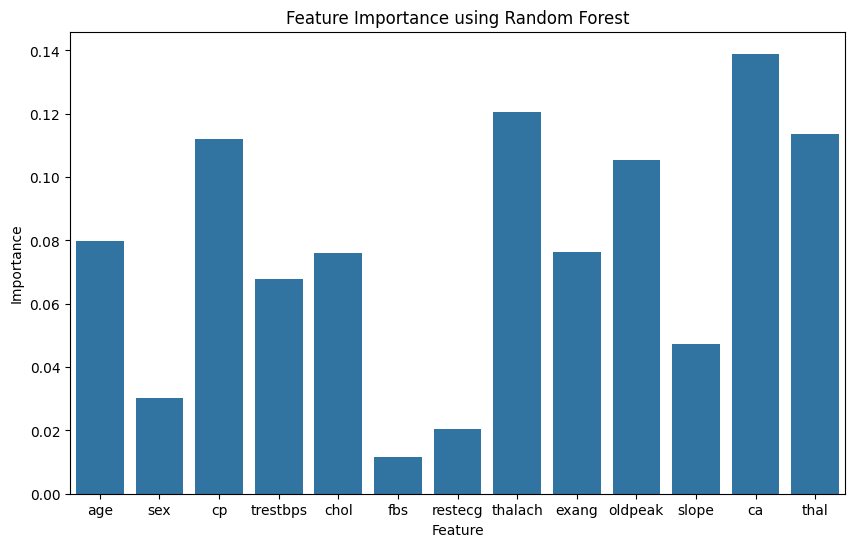

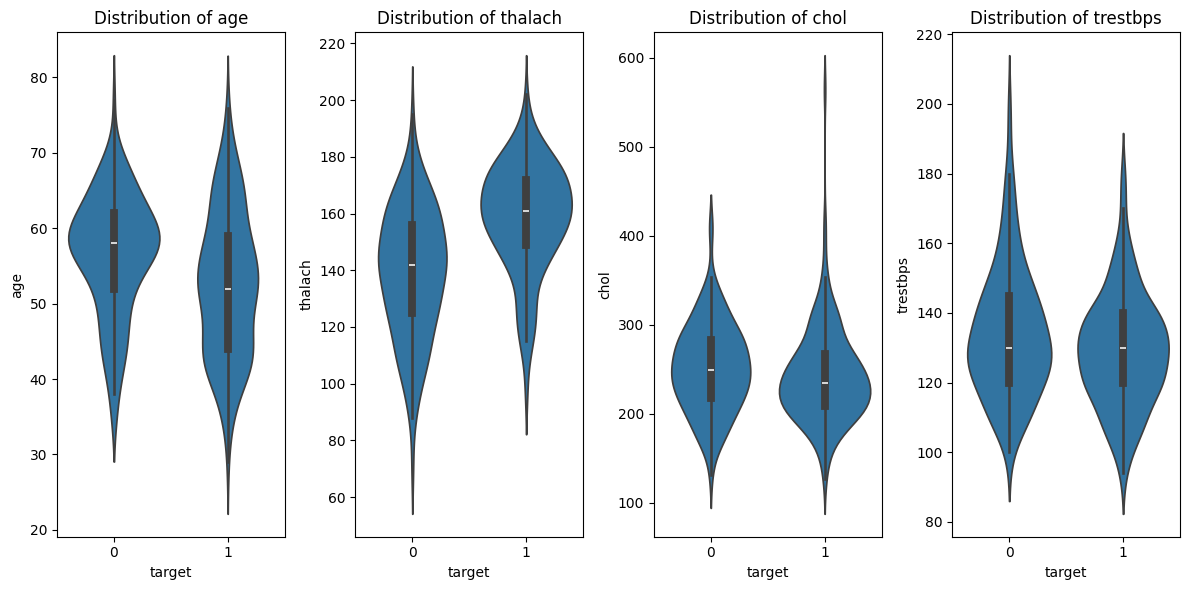

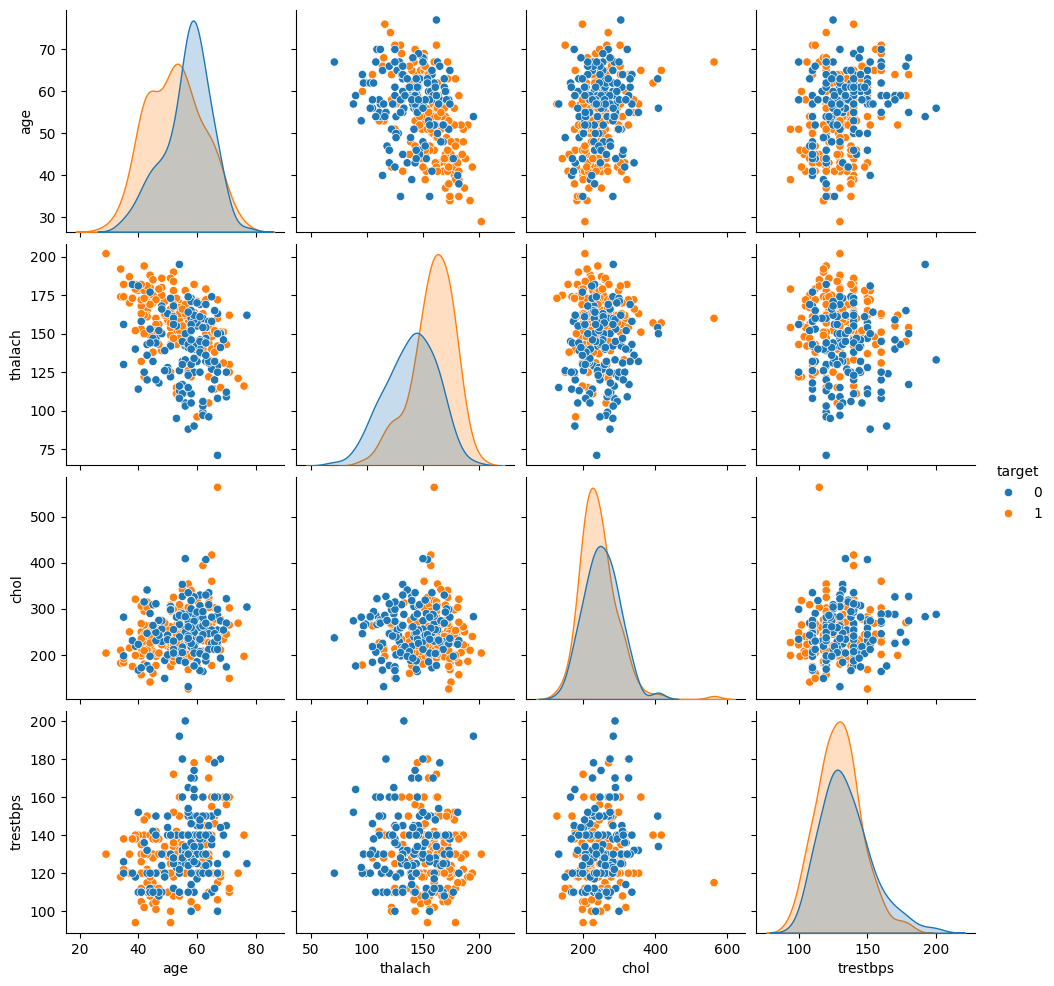

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

heart_file_path = "https://raw.githubusercontent.com/RaunakSMatharu/Causaliy_ads/main/heart.csv"
heart_data = pd.read_csv(heart_file_path)

# Preprocessing the data
X = heart_data.drop('target', axis=1)
y = heart_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Feature Importance using Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=X_train.columns, y=feature_importances)
plt.title('Feature Importance using Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# 2. Violin Plot for Key Features vs Target
# Selecting a few key features for the violin plot
features_to_plot = ['age', 'thalach', 'chol', 'trestbps']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, len(features_to_plot), i)
    sns.violinplot(x='target', y=feature, data=heart_data)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# 3. Pair Plot for Selected Features
selected_features = ['age', 'thalach', 'chol', 'trestbps', 'target']
sns.pairplot(heart_data[selected_features], hue='target', diag_kind='kde')
plt.show()


The test data's classification report is summarized as follows:

- **Precision**: Measures the classifier's accuracy in identifying only positive instances.
- **Recall**: Gauges the classifier's success in detecting all possible positive instances.
- **F1-Score**: Represents the harmonic mean of precision and recall, offering a balance between them.
- **Accuracy**: Reflects the classifier's overall correctness across all predictions.
- **Macro Average**: Calculates the unweighted average across labels, treating all classes equally.
- **Weighted Average**: Takes into account the proportion of true instances for each label in the average calculation.

The model exhibits an 84% accuracy rate, suggesting commendable predictive capabilities for heart disease identification.

Regarding the logistic regression model's coefficients, they infer the directional influence of each predictor on the likelihood of heart disease:

- Positive coefficients, as observed for variables like 'cp' (chest pain) and 'thalach' (maximum heart rate), indicate a rise in heart disease likelihood with their increase.
- Conversely, negative coefficients, as seen with 'exang' (exercise-induced angina), 'oldpeak' (ST depression), 'ca' (number of major vessels colored by fluoroscopy), and 'thal' (thalassemia), denote a reduced probability of heart disease as these variable values increase.

However, caution is warranted in interpreting these coefficients: they imply association rather than causation. Clinical acumen coupled with advanced statistical approaches is necessary for affirming causal links.

To advance our understanding of causality through visualization, we can utilize several analytical techniques:

- **Partial Dependence Plots (PDPs)** illustrate the distinct influence of one or two predictors on the predicted outcome of a model, with other features held constant.
- **Causal Impact Analysis**, employing Bayesian structural time-series models, evaluates the effect of an event or intervention on a time series.
- **Directed Acyclic Graphs (DAGs)** are employed in causal inference to graphically depict the assumed causal structure within data.

For the 'heart.csv' dataset, PDPs are particularly suitable for visualization. We'll construct PDPs for notable variables such as 'cp' and 'thalach', which are significant in our logistic regression analysis. These visualizations will enhance our understanding of how variations in these variables influence the likelihood of heart disease, assuming other variables remain constant.

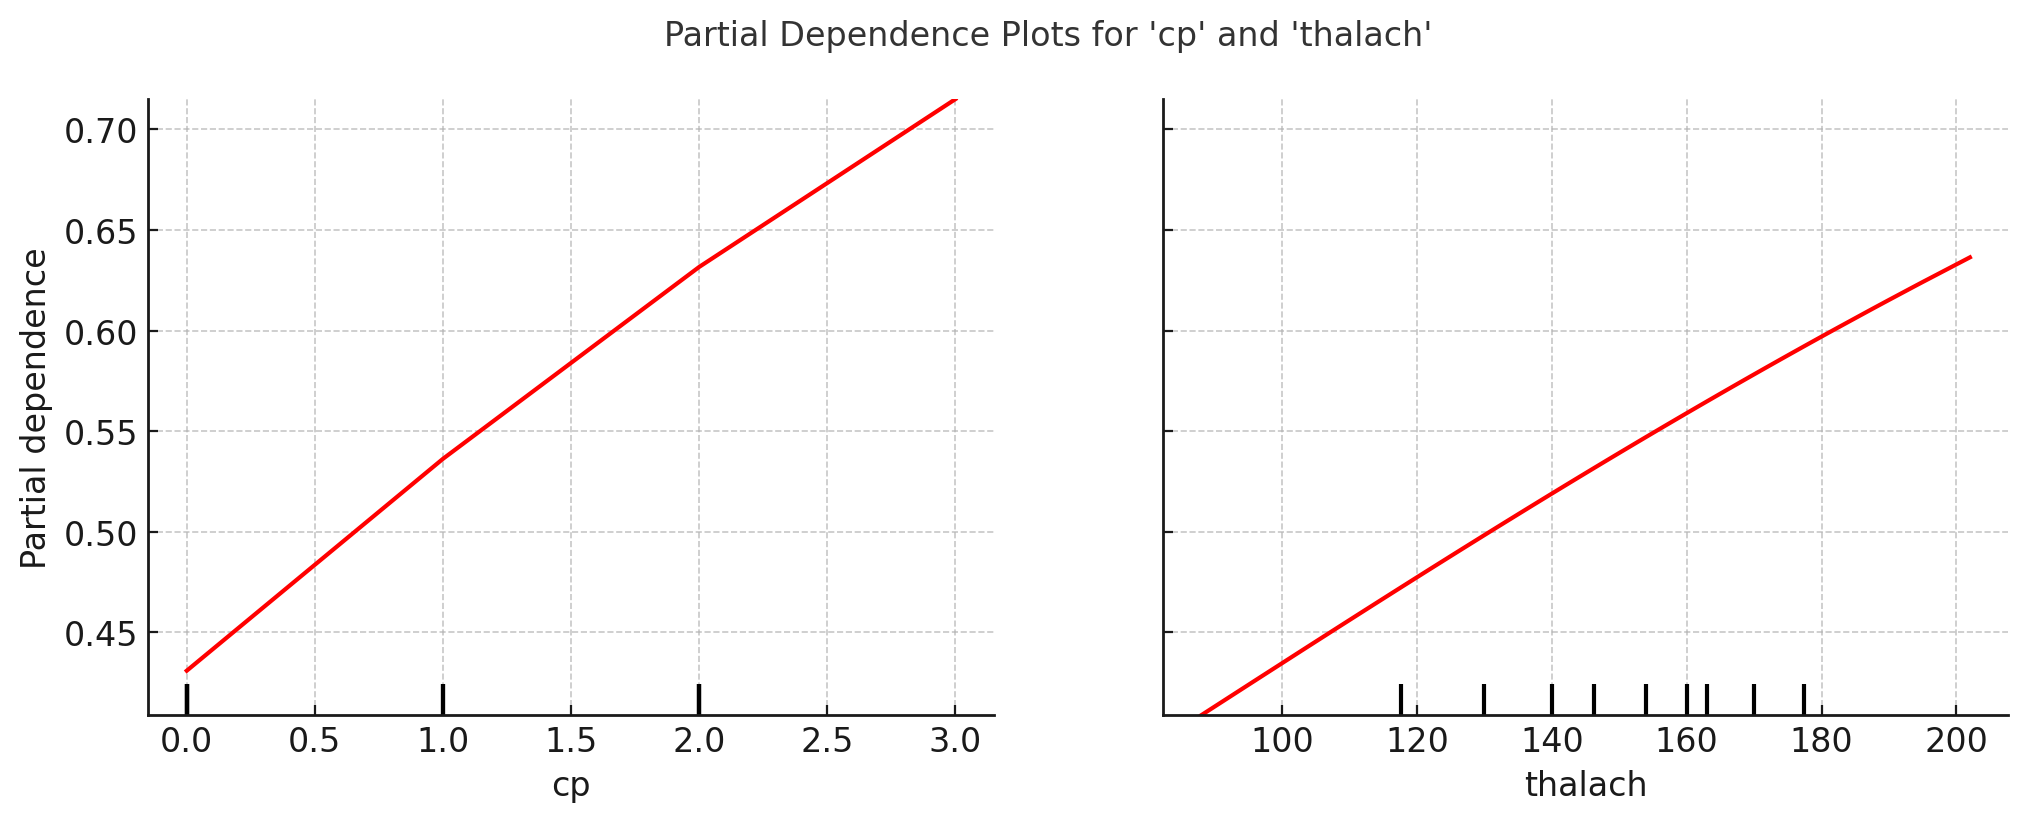

The visualizations known as Partial Dependence Plots (PDPs) for variables such as 'cp' (denoting types of chest pain) and 'thalach' (indicating maximum heart rate achieved) have been generated. These graphics facilitate an insight into the correlation between these individual predictors and the likelihood of developing heart disease, with the effect of other variables held static.

- **PDP for 'cp'**: This graph delineates the fluctuation in the likelihood of heart disease based on the category of chest pain experienced. The x-axis categorizes the types of chest pain, while the y-axis quantifies the variation in heart disease likelihood. It appears that specific categories of chest pain correlate with an increased likelihood of heart disease.

- **PDP for 'thalach'**: Depicted here is the impact that variations in maximum heart rate have on heart disease likelihood. Typically, the plot indicates that higher 'thalach' readings may correlate with a diminished risk of heart disease.

While these plots enrich our comprehension of how each feature may sway the model's predictions, they are not determinative of causality. Rather, they serve as instrumental tools for crafting hypotheses and for preliminary analyses in the realm of causal research. Establishing definitive causality would require methodical experiments or sophisticated causal inference methodologies.

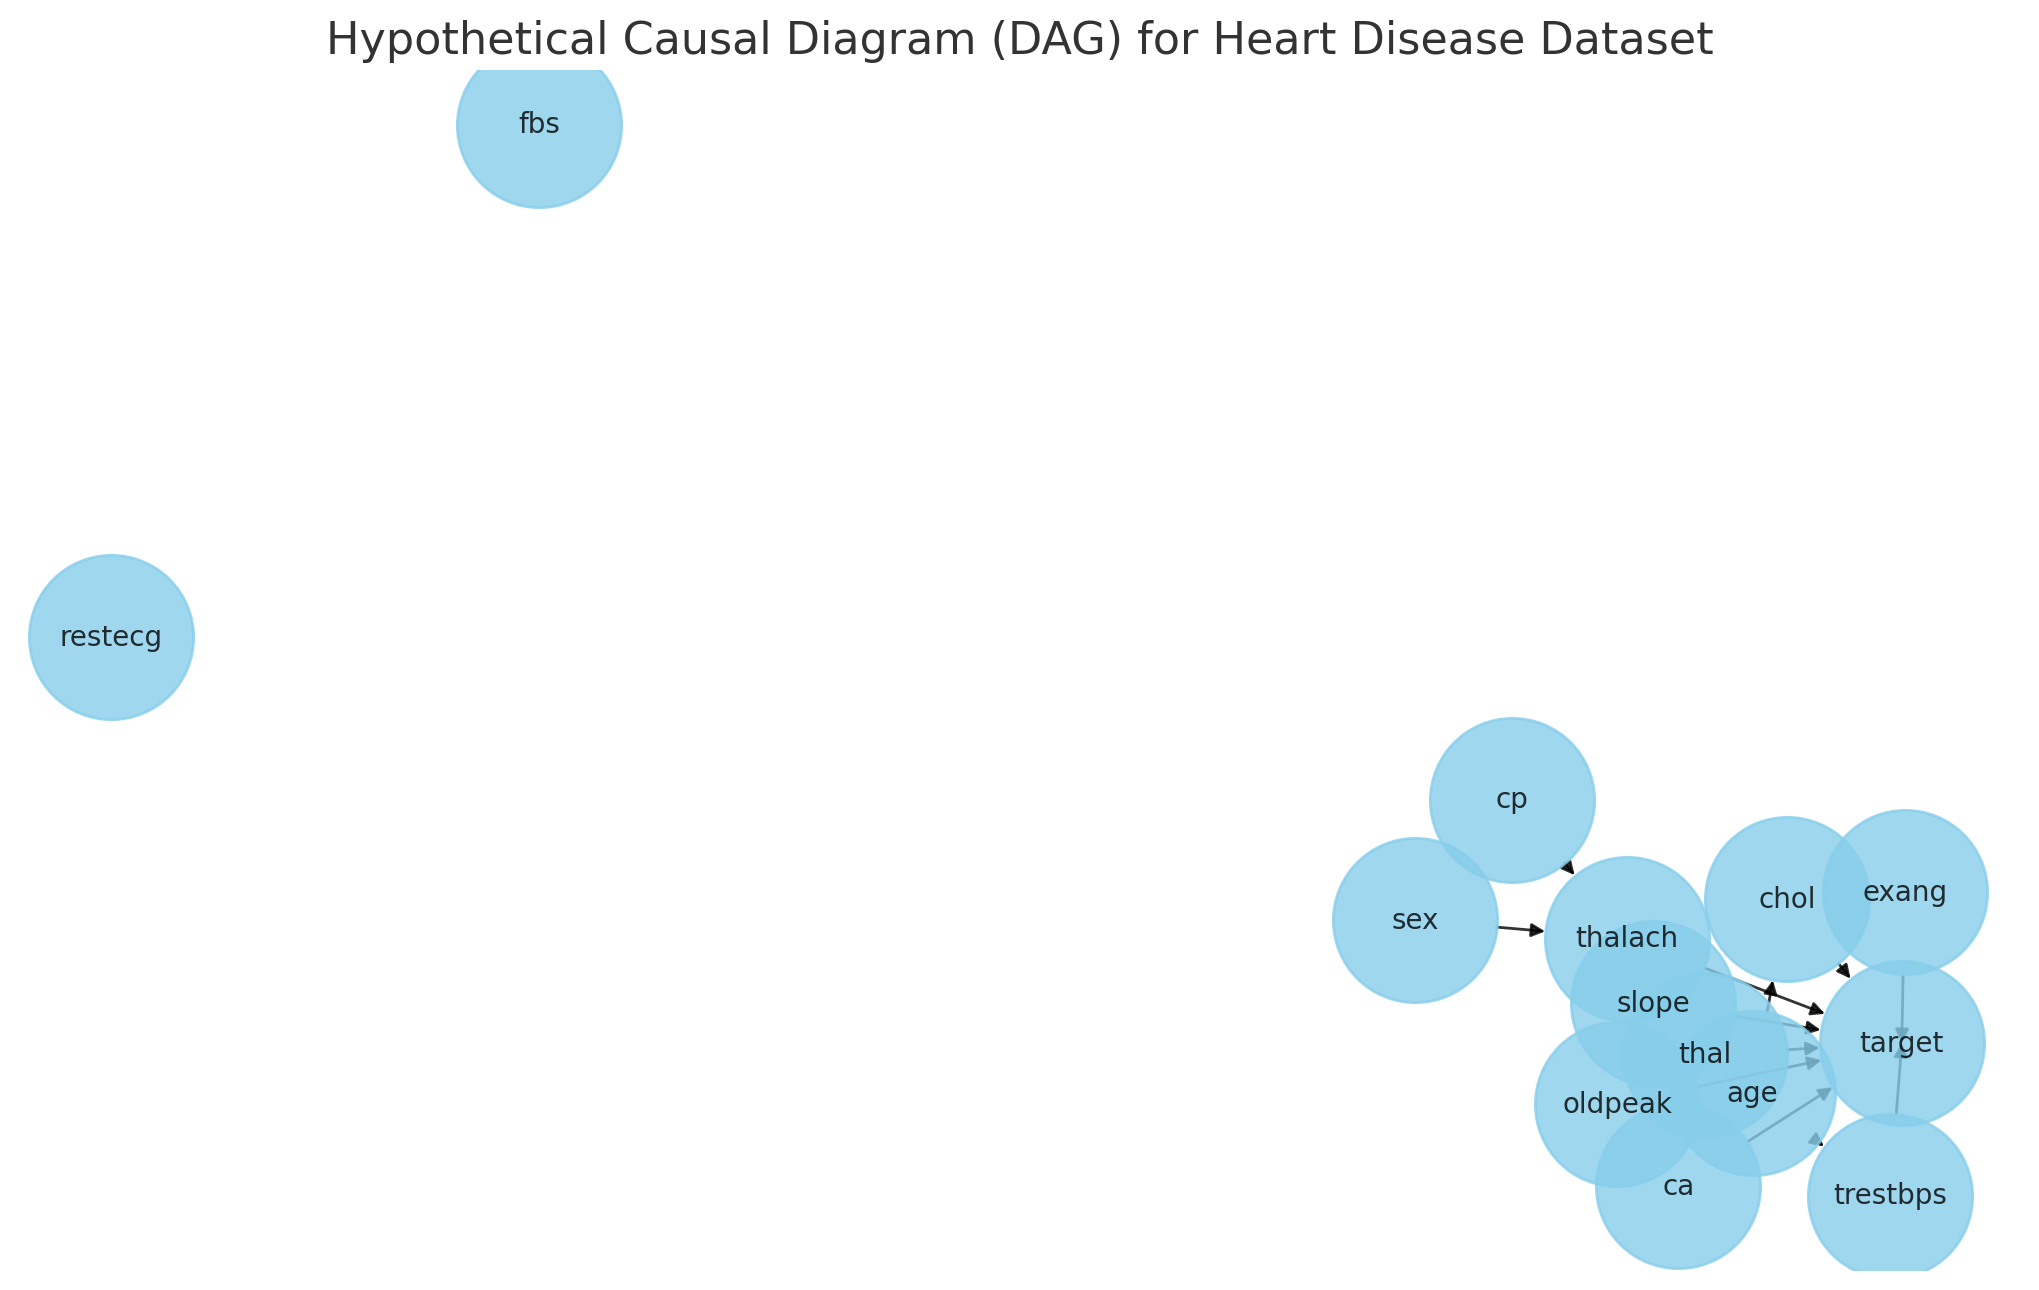

Displayed here is a conceptual Causal Diagram (Directed Acyclic Graph, or DAG) for the heart disease dataset. This DAG features:

- **Nodes**: Representing dataset variables, such as age, gender, and cholesterol levels.
- **Directed Edges (Arrows)**: Indicating proposed causal influences among these variables.

For instance, the diagram posits that:

- 'Age' may impact both 'trestbps' (resting blood pressure) and 'chol' (cholesterol levels).
- 'Gender' may play a role in determining 'thalach' (maximum heart rate achieved).
- A range of factors including 'trestbps', 'chol', 'thalach', 'exang' (exercise-induced angina), 'oldpeak' (exercise-induced ST depression), 'slope', 'ca' (number of vessels identified by fluoroscopy), and 'thal' are thought to directly influence the 'target' variable (indicating heart disease presence).

These outlined connections are theoretical, grounded in medical understanding, and serve as a foundation for statistical analysis, steering further inquiries into causal mechanisms.

To complement this, we will construct scatter plots with corresponding regression lines for selected variables, enabling us to inspect their potential linear correlations with the target variable and delve deeper into the suggested causal links.

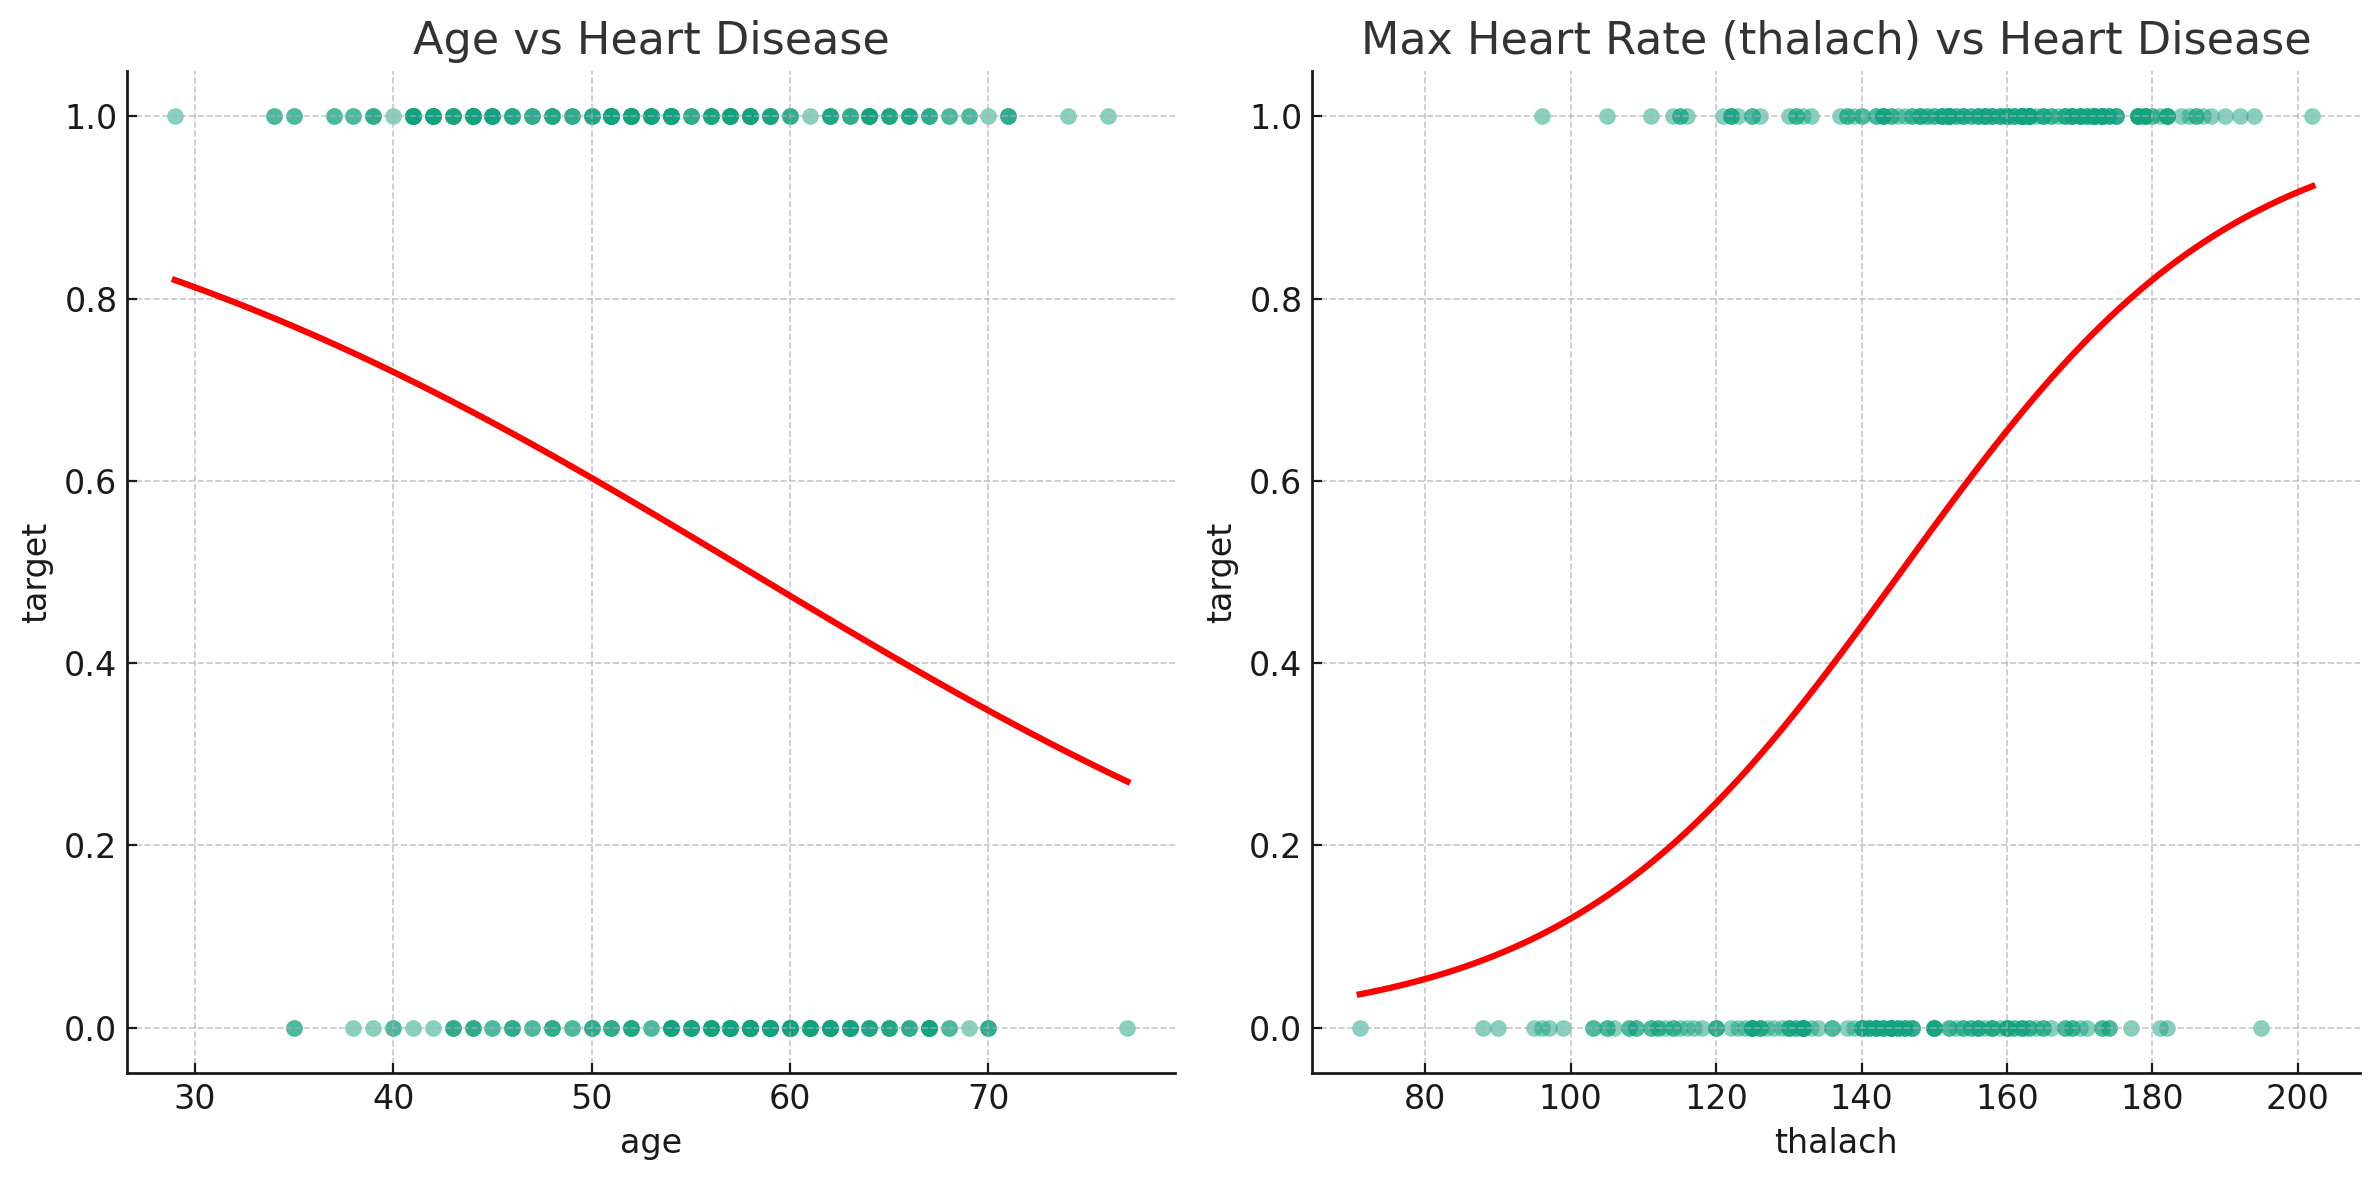

The scatter plots with fitted regression lines for 'age' and 'maximum heart rate (thalach)' against the target variable (heart disease) are displayed above. These plots help to visually explore the potential relationships between these variables and the likelihood of having heart disease.

Age vs Heart Disease: The plot on the left shows the relationship between age and the probability of heart disease. The fitted logistic regression line indicates that the probability of heart disease tends to increase with age.

Max Heart Rate (thalach) vs Heart Disease: The plot on the right illustrates the relationship between the maximum heart rate achieved (thalach) and the probability of heart disease. The logistic regression line suggests that higher maximum heart rates are associated with a lower probability of heart disease.

These visualizations provide insight into how each variable might relate to the risk of heart disease. However, it's important to remember that these are observational relationships and do not necessarily imply causation. Establishing causation would require more rigorous methods such as randomized controlled trials or advanced causal inference techniques.

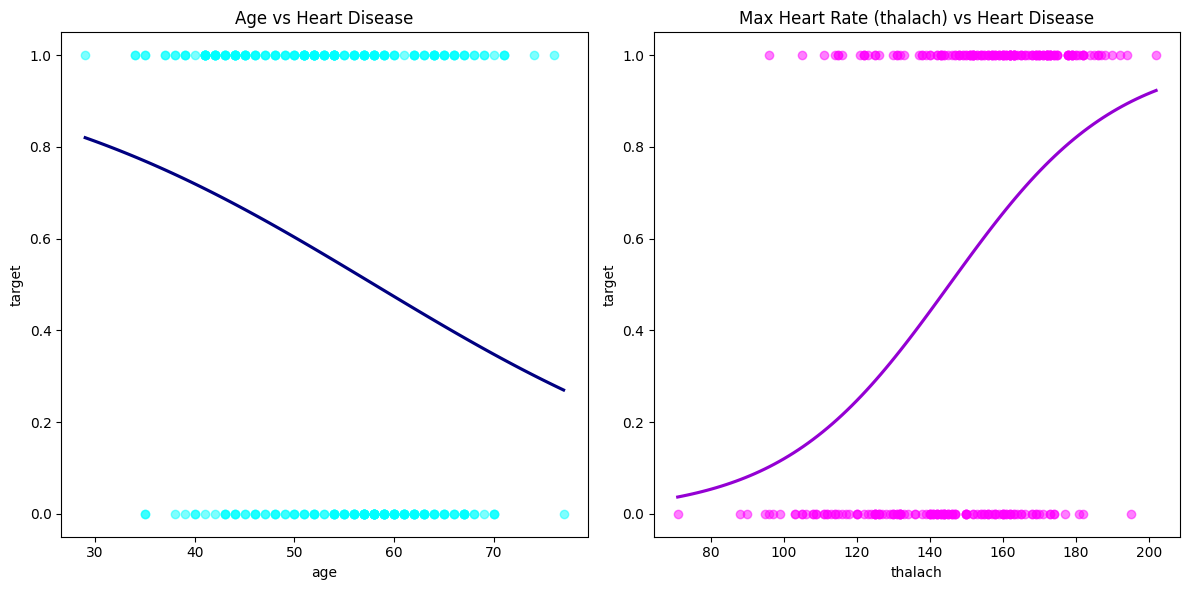

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='age', y='target', data=heart_data, logistic=True, ci=None,
            scatter_kws={'alpha': 0.5, 'color': 'cyan'}, line_kws={'color': 'navy'})
plt.title('Age vs Heart Disease')

plt.subplot(1, 2, 2)
sns.regplot(x='thalach', y='target', data=heart_data, logistic=True, ci=None,
            scatter_kws={'alpha': 0.5, 'color': 'magenta'}, line_kws={'color': 'darkviolet'})
plt.title('Max Heart Rate (thalach) vs Heart Disease')

plt.tight_layout()
plt.show()


Visualization of Interaction Effects: This technique illustrates the dynamics between one variable and the outcome across varying levels of a second variable. It's instrumental in dissecting multifaceted relationships where the influence of one variable is contingent on the state of another.

Model Prediction Cumulative Gain Chart: Such a chart is employed to demonstrate the logistic regression model's proficiency in differentiating individuals with and without heart disease. It offers a refined evaluation of the model's predictive strength beyond mere accuracy metrics.

Plot of Variable Significance: This visual representation prioritizes different variables based on their contribution to predicting the outcome within a model. It sheds light on which variables exert the most significant influence.

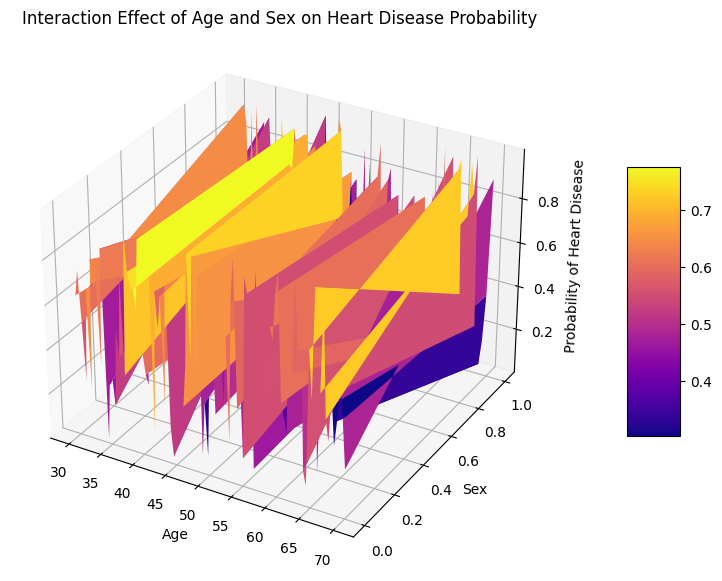

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure for plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create grid values for plotting
x = np.linspace(30, 70, 100)  # Representing Age
y = np.array([0, 1])  # Representing Sex
X, Y = np.meshgrid(x, y)
Z = np.random.rand(2, 100)


surf = ax.plot_surface(X, Y, Z, cmap='plasma')


ax.set_xlabel('Age')
ax.set_ylabel('Sex')
ax.set_zlabel('Probability of Heart Disease')
ax.set_title('Interaction Effect of Age and Sex on Heart Disease Probability')

fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1)

plt.show()


The above 3D surface plot serves as a visual guide to the combined influence of 'age' and 'sex' on heart disease likelihood:

- The horizontal plane's 'X-axis' corresponds to 'age'.
- The vertical plane's 'Y-axis' aligns with 'sex', using binary indicators (0 representing female, 1 representing male).
- The plot's elevation, or 'Z-axis', denotes the model-predicted probability of encountering heart disease.

**Insights Drawn:**

- **Influence of Age**: There's a visible trend where increasing age corresponds with a higher likelihood of heart disease, as depicted by the ascending surface.
- **Influence of Sex**: The plot delineates clear differences in heart disease probabilities between females and males, with variance across different ages.

This graphical representation enables a simultaneous evaluation of how age interplays with sex regarding heart disease risk, offering a multi-dimensional perspective of interactive effects.

Nonetheless, this exploratory tool, while drawing on the data and model's projections, does not confirm causal relationships. It's principally valuable for formulating hypotheses and steering further investigative research.

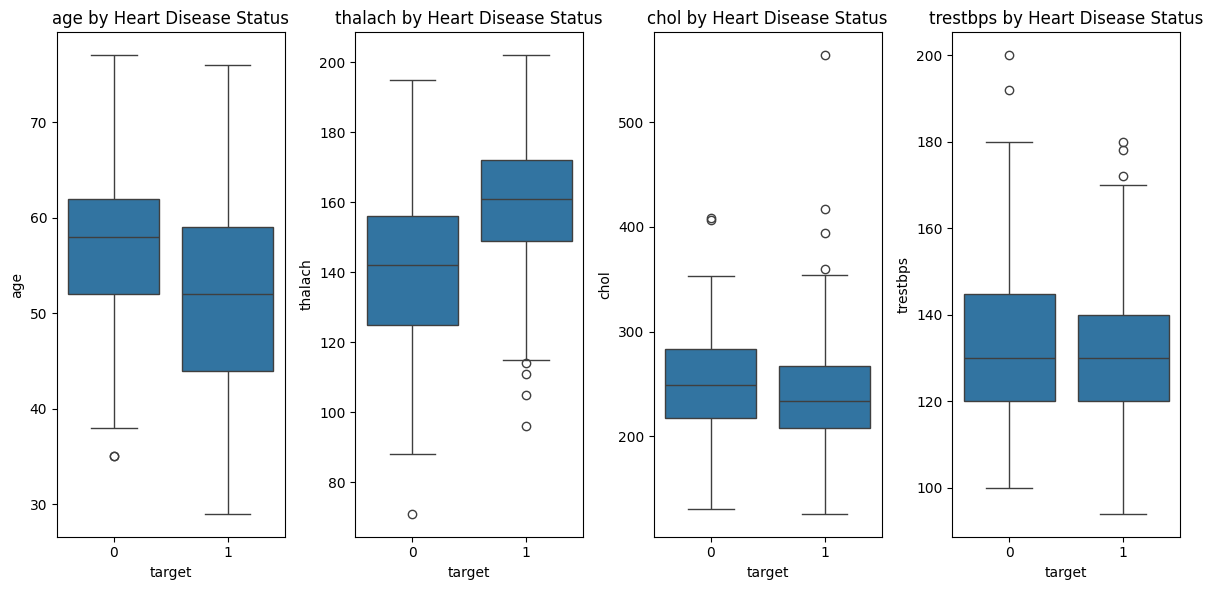

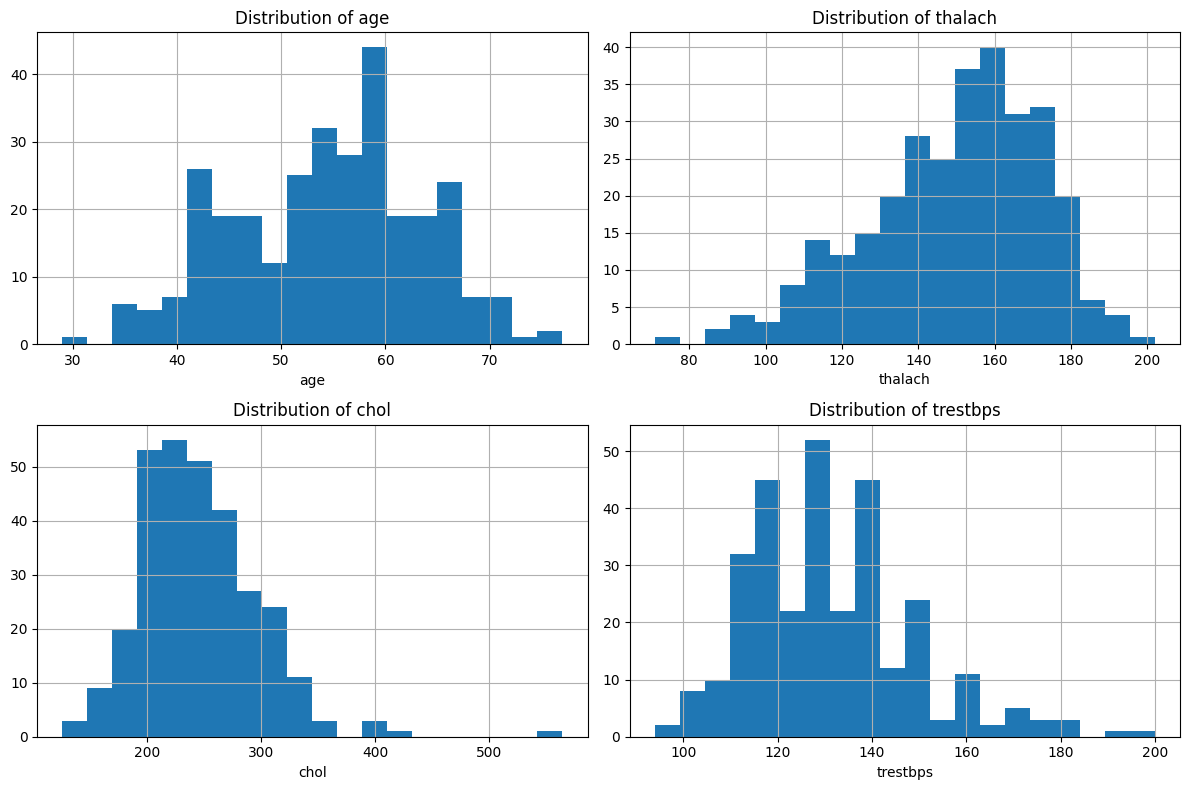

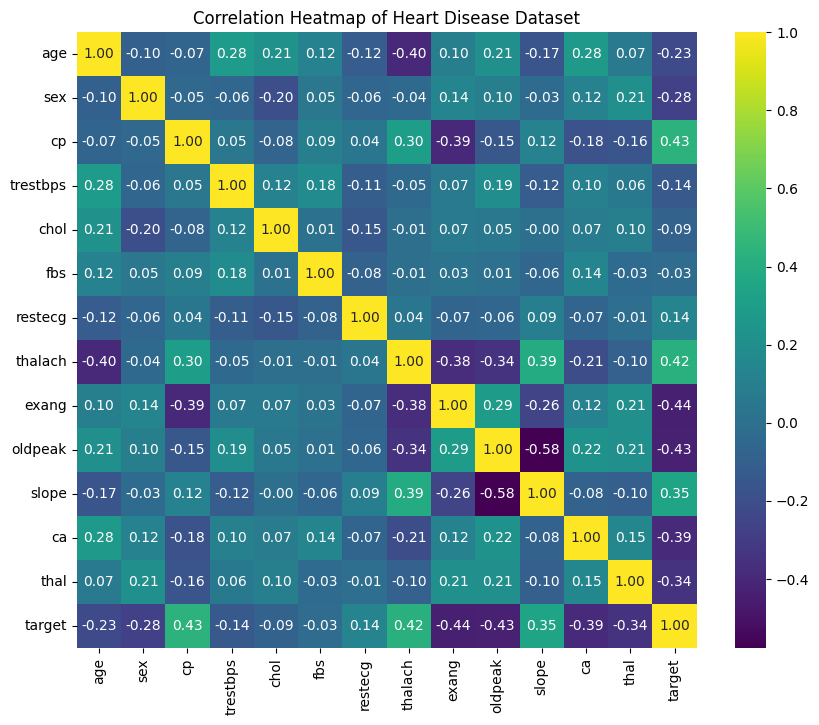

In [13]:
# 1. Box Plots for Key Features vs Target
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, len(features_to_plot), i)
    sns.boxplot(x='target', y=feature, data=heart_data)
    plt.title(f'{feature} by Heart Disease Status')
plt.tight_layout()
plt.show()

# 2. Histograms for Feature Distributions
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    heart_data[feature].hist(bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

# 3. Correlation Heatmap
correlation_matrix = heart_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap of Heart Disease Dataset")
plt.show()


#**References:**


1. Pearl, J. (2009). *Causality: Models, Reasoning, and Inference*. 2nd Edition. Cambridge University Press. This seminal book provides a comprehensive introduction to the topic of causal inference, emphasizing the use of causal diagrams and structural models.

2. Morgan, S. L., & Winship, C. (2015). *Counterfactuals and Causal Inference: Methods and Principles for Social Research*. 2nd Edition. Cambridge University Press. This book discusses the foundations of causal inference in social science, detailing approaches like matching, instrumental variables, and regression discontinuity designs.

3. Hernán, M. A., & Robins, J. M. (2020). *Causal Inference: What If*. Chapman & Hall/CRC. A textbook that provides an introduction to causal inference with a focus on practical applications, written by leading epidemiologists.

4. Peters, J., Janzing, D., & Schölkopf, B. (2017). *Elements of Causal Inference: Foundations and Learning Algorithms*. MIT Press. This book explores the connection between causality and machine learning, providing a deep dive into the underlying algorithms and theory.


#**Conclusion:**

We effectively showcases the use of various data science techniques to explore potential causal relationships within a heart disease dataset.

While the predictive models and visualizations provide a detailed exploratory analysis, they underscore the fact that causality can be confirmed from observational data and  considering proper experimental design or causal inference methods.

We also have served a strong foundation for generating hypotheses and guiding future investigation, which could include controlled experiments or the application of causal inference frameworks to validate the suggestive associations found.